In [7]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# 下载数据
def fetch_housing_data(housing_url=HOUSING_URL,housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
           os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# fetch_housing_data()

In [13]:
import pandas as pd 
# 加载本地数据放方法
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

# 调用方法，加载数据
housing=load_housing_data()

In [15]:
# 查看数据结构
housing.head()
# 每一行都代表一个区域。一种一个属性
# longitude经度 latitude纬度 housing_median_age房屋年限 total_rooms房间数  total_bedrooms卧室数目 
# population人口 households家户数  median_income中位数收入 median_house_value房价中位数 ocean_proximity离海距离

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
housing.info()
# info()方法可以快速查看数据描述，尤其是总行数，每一个属性的数据类型和所有非null数据的数量
# 一共是20640个实例，意味着对于机器学习来说数据量太小了，但是对于初学来讲完美。注意到total_bed_rooms 属性只有20433
# 个非null值，意味着有207领域没有这一属性。我们一会要特别注意一下这点。所有的属性都是用数字表示的，除了
# ocean_proximity属性。这是一个object类型属性，因此可以接收任何一种python对象，但是当你加载csv文件加载之后，你知道
# 必须是文本属性。当你看顶部的前五行，你可能注意到那一行的数值重复了，这就意味着，这很有可能是一个分类属性。你可以
# 通过value_counts()方法找出有哪些分类存在,并且有多少个区域属于每一个分类.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
# 通过value_counts()方法找出有哪些分类存在,并且有多少个区域属于每一个分类.
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
# count,mean,min,和max 是不言自明的。注意到null类型被忽略了（total_bedrooms是20433，而不是20640）。
# std行是标准差。25%，50%，75%行表示相应的百分比：表示一组观察值中给定百分比以下的值.例如，有25%的地区房屋年龄中位数
# 低于18，同时50%低于29,75%低于37。
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


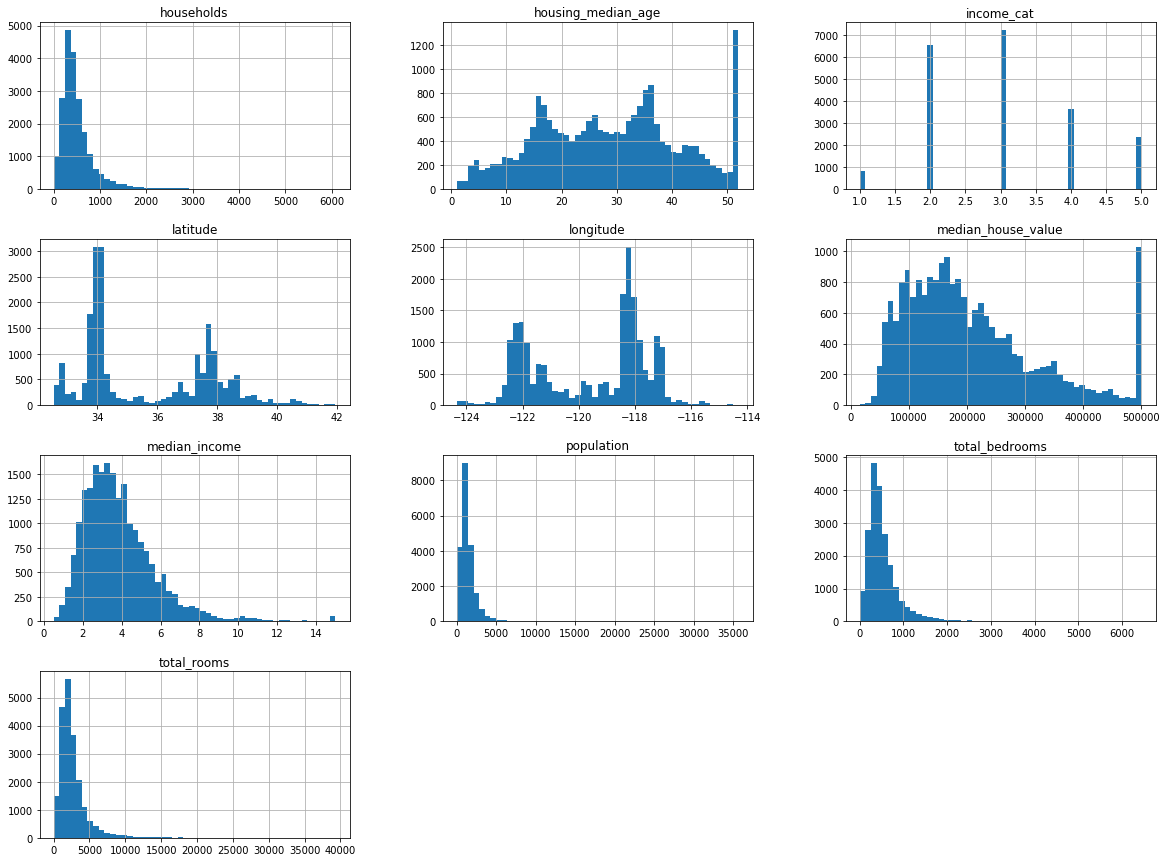

In [23]:
# 另外一个快速对数据有一个整体感觉的方法是，通过直方图展示每一个属性数据。
#只有在jupyter里面使用
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()
# hist()方法依赖于Matplotlib，而Matplotlib又依赖于系统后端桌面专门绘制用户图表。因此在你
# 显示图标之前，你要指定Matplotlib依赖的绘制系统。最简单的做法就是使用Jupyter自己的后端。
# 在行内使用%matplotlib命令。这就告诉matplotlib 使用Jupyter自己的后端。然后Jupyter就会在
# 内部渲染。注意到show()方法在Jupyter是可选的，因为Jupyter启动时会自动展示。

In [13]:
# 从以上表格中看出：
# 1)中位数收入不像是通过美元表示的。您被告知，对于较高的中位数收入，该数据被缩放并限制在
# 15(实际上是15.0001)，对于较低的中位数收入，该数据被限制在0.5(实际上是0.4999)。
# 2)房子年龄中位数和房价中位数也被限制了。面对这种情况，有两种选择：
# a.为标签被封顶的地区收集适当的标签
# b.将这些区域从培训集中移除(也从测试集中移除，因为如果您的系统预测值超过50万美元，
# 那么您的系统不应该被评估得很差)
# 3)这些属性具有非常不同的比例。我们将在本章后面探讨特征缩放时讨论这个问题。
# 4)最后，许多直方图的尾部较重:它们向中间值右侧延伸的距离比向左延伸的距离远得多。
# 这可能会使一些机器学习算法更难检测模式。稍后我们将尝试将这些属性转换为更多钟形分布。
# 
# 注意：
# 稍等！在你进一步做数据分析之前，你需要创建一个测试集，然后把它放边上，不要再看那些数据。
# 避免data snooping bias资料窥视偏差

In [21]:
# 创建测试数据集
# 创建数据集理论上讲很简单：随机抽取20%的数据集，然后放边上。
import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set=split_train_test(housing,0.2)
print (len(train_set),"train +",len(test_set),"test")
# 这样的做法并不完美，如果你重新跑一次代码每次都会产生不一样的测试集。时间久了，就会
# 把所有数据都看一遍了，这是要避免的。
# 两种解决办法，一种是第一次跑完之后，就把数据存起来，在随后的运行中使用，第二中就是在
# 调用np.random.permutation()方法之前调用np.random.seed(42)，那样的话，每次生成的都是一
# 样的随机数据。

16512 train + 4128 test


In [17]:
# 但是以上这两种方法都会在你更新数据集之后，变得无效。一个常见的解决方案是使用每个实例的
# 标识符来决定它是否应该进入测试集(假设实例具有惟一且不可变的标识符)。例如，您可以计算每
# 个实例标识符的哈希值，只保留哈希值的最后一个字节，如果该值小于或等于51(约256的20%)，则
# 将实例放入测试集。这确保测试集在多次运行时保持一致，即使刷新数据集也是如此。新的测试集
# 将包含20%的新实例，但是它将不包含以前在训练集中的任何实例。下面是一个可能的实现:
import hashlib

def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set] 

In [18]:
# 房屋数据集没有id，最简单的办法是使用位置索引当做id
housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

# print (test_set["index"])

# 如果你把行号当做一个唯一的标识符，你需要确保新数据被追加到数据集的末尾，并且不会删除
# 任何行。如果这是不可能的，那么您可以尝试使用最稳定的特性来构建唯一的标识符。例如，一
# 个地区的纬度和经度可以保证在几百万年内保持稳定，因此可以将它们组合成这样的id：
housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"id")
# print (test_set["id"])
# 打印结果看出，经纬度相加并不能保证id唯一


In [19]:
# 事实上，sklearn有一个方法，功能和之前定义的split_train_test（）方法类似，方法名字
# train_test_split（）
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print (test_set.describe())

        longitude    latitude  housing_median_age   total_rooms  \
count  4128.00000  4128.00000         4128.000000   4128.000000   
mean   -119.51936    35.58671           28.764293   2610.796269   
std       1.99447     2.13276           12.518304   2209.359101   
min    -124.19000    32.54000            1.000000      6.000000   
25%    -121.69000    33.93000           18.000000   1420.000000   
50%    -118.47000    34.23000           29.000000   2110.000000   
75%    -117.99000    37.70000           37.000000   3099.250000   
max    -114.58000    41.81000           52.000000  37937.000000   

       total_bedrooms    population   households  median_income  \
count     3921.000000   4128.000000  4128.000000    4128.000000   
mean       535.233104   1421.571705   497.750727       3.830338   
std        431.299704   1114.023136   387.770570       1.881515   
min          2.000000      8.000000     2.000000       0.499900   
25%        294.000000    781.000000   278.000000       2.5485

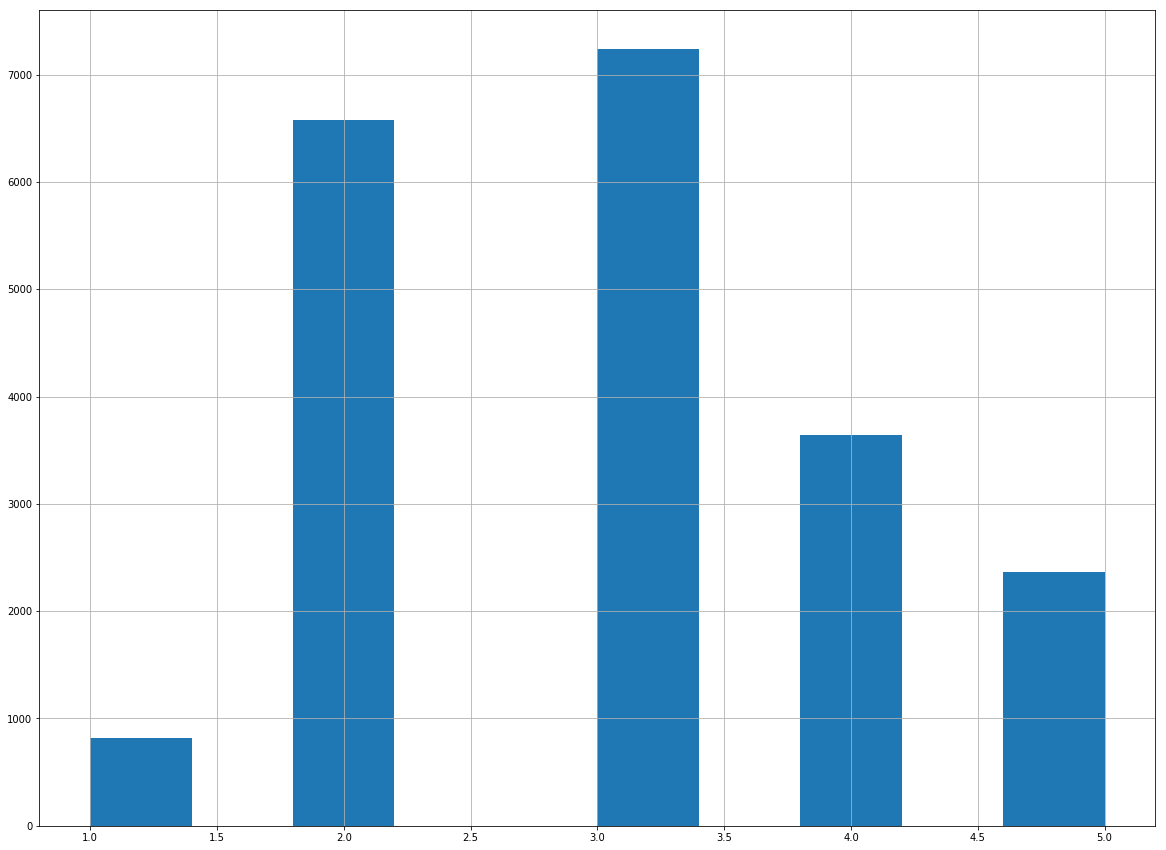

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64


In [24]:
# 到目前为止，我们已经考虑了纯随机抽样方法。如果您的数据集足够大(尤其是相对于属性的数量而
# 言)，这通常是可以接受的， 但是如果数据集不够大，则可能会引入显著的抽样偏差。当一个调查
# 公司决定给1000个人打电话问几个问题时，他们不会在电话亭随机挑选1000个人。他们试图确保这
# 1000人代表整个人口。例如，美国的人口由51.3%的女性和48.7%的男性组成，所以在美国进行的一
# 项很好的调查会试图在样本中保持这一比例:513名女性和487名男性。这被称为分层抽样:将总体划
# 分为称为地层的均匀亚群，从每一层抽取适当数量的实例，以保证测试集能够代表总体。如果他们
# 使用纯粹的随机抽样，那么在一个倾斜的测试集中，有12%的几率会对少于49%的女性或者多于54%的
# 女性进行抽样。不管怎样，调查结果都会有很大的偏差。
# 
# 假设你和专家聊天，他们告诉你中位数收入是预测中位数房价的一个非常重要的因素。您可能希望
# 确保测试集能够代表整个数据集中的各种收入类别。由于中位数收入是一个连续的数字属性，所以
# 首先需要创建一个income category属性。让我们更加直观地看看median income直方图：
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
housing["income_cat"].hist(bins=10,figsize=(20,15))
plt.show()
# 现在就准备好基于收入分类做分层抽样了。你可以使用Scikit-Learn's StratifiedShuffledSplit类：
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# 让我们看看这样是否有效。你可以收入分类是否在整体房屋数据集housing：

print(housing["income_cat"].value_counts()/len(housing))


